# Project 6 plus
### EAE 127 <br> Edgardo Rivera Godoy

## Introduction
In this project different airfoils (NACA 0012, NACA 2412, and P51D) will be compared by conducting 2D analysis. The $\alpha$, $C_l$, $D$, and $L/D$ will be compared. Then, different wing shapes will be compared for the P51D airfoil in order to compare these 3D results to the 2D results.

## Imports and Plotting Setup

In [1]:
#IMPORTS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import os
import pyxfoil
from astropy.table import Table
from IPython.display import HTML, display


### JUPYTER NOTEBOOK SETTINGS ########################################
#Plot all figures in full-size cells, no scroll bars
%matplotlib inline 
#Disable Python Warning Output 
#(NOTE: Only for production, comment out for debugging)
import warnings
warnings.filterwarnings('ignore')

### PLOTTING DEFAULTS BOILERPLATE (OPTIONAL) #########################
#SET DEFAULT FIGURE APPERANCE
import seaborn as sns #Fancy plotting package
#No Background fill, legend font scale, frame on legend
sns.set(style='whitegrid', font_scale=1.5, rc={'legend.frameon': True})
#Mark ticks with border on all four sides (overrides 'whitegrid')
sns.set_style('ticks')
#ticks point in
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})
#fix invisible marker bug
sns.set_context(rc={'lines.markeredgewidth': 0.1})
#SET MATPLOTLIB DEFAULTS
    #(call after seaborn, which changes some defaults)
params = {
        #FONT SIZES
        'axes.labelsize' : 30, #Axis Labels
        'axes.titlesize' : 30, #Title
        'font.size'      : 28, #Textbox
        'xtick.labelsize': 22, #Axis tick labels
        'ytick.labelsize': 22, #Axis tick labels
        'legend.fontsize': 24, #Legend font size
        'font.family'    : 'serif',
        'font.fantasy'   : 'xkcd',
        'font.sans-serif': 'Helvetica',
        'font.monospace' : 'Courier',
        #AXIS PROPERTIES
        'axes.titlepad'  : 2*6.0, #title spacing from axis
        'axes.grid'      : True,  #grid on plot
        'figure.figsize' : (8,8),   #square plots
        'savefig.bbox'   : 'tight', #reduce whitespace in saved figures
        #LEGEND PROPERTIES
        'legend.framealpha'     : 0.5,
        'legend.fancybox'       : True,
        'legend.frameon'        : True,
        'legend.numpoints'      : 1,
        'legend.scatterpoints'  : 1,
        'legend.borderpad'      : 0.1,
        'legend.borderaxespad'  : 0.1,
        'legend.handletextpad'  : 0.2,
        'legend.handlelength'   : 1.0,
        'legend.labelspacing'   : 0,
}
import matplotlib
matplotlib.rcParams.update(params) #update matplotlib defaults, call after seaborn
### END OF BOILERPLATE ##################################################

## Problem 1
### Methods
For this problem, the Re needs to be calculated using the given data. This Re can then be used to calculate the $C_l$ for both cases. Next, the calculated Re along with the given values and an array of $\alpha$s needs to be used in pyxfoil to calculate $C_l$ and $C_d$ in order to create the drag polar, the lift curve, and the L/D vs $\alpha$ plots.


### Equations
Reynolds Number:
$$ Re = \frac{\rho_\infty V_\infty c}{\mu} $$

Coefficient of lift at cruise required for equilibrium, level flight:
$$ C_{l,cruise} = \frac{W}{0.5\rho_\infty V_\infty^2 S}$$

Coefficient of lift at a 2g turn required for equilibrium, level flight:
$$ C_{l,2g} = \frac{2W}{0.5\rho_\infty V_\infty^2 S}$$

Approximate 3D wing:
$$ C_{L,cruise} = C_{l,cruise}$$
$$ C_{L,2g} = C_{l,2g}$$

Lift to Drag Ratio:
$$\frac{L}{D} = \frac{C_l}{C_d}$$

Drag:
$$D = C_D \frac{1}{2}\rho_\infty V_\infty^2 S$$

### Code and Results
The code below calculates the Re and both $C_l$'s.

In [11]:
S = 235 #ft^2
c = 8.48 #ft
b = 50 #ft
Vinf = 350 #mph
Vinf = Vinf*1.46667
h = 19000 #ft
W = 9200 #lbs
mu = 3.25e-7 #slugs/ft s
rho = 1.3107e-3 # slugs/ft^3

Re = rho*Vinf*c/mu

Cl_cruise = W/(.5*rho*Vinf**2 *S)
Cl_2g = 2*W/(.5*rho*Vinf**2 *S)
print('The reynolds number is {:.3E}'.format(Re))
print('The Cl required for equilibrium, level flight at cruise is {:.3f}'.format(Cl_cruise))
print('The Cl required for equilibrium, level flight at a 2g turn is {:.3f}'.format(Cl_2g))

The reynolds number is 1.756E+07
The Cl required for equilibrium, level flight at cruise is 0.227
The Cl required for equilibrium, level flight at a 2g turn is 0.453


The code below obtains the $C_l$ and $C_d$ for an array of $\alpha$'s for the NACA 0012 airfoil.

In [14]:
foil = '0012' #NACA airfoil number
naca = True   #allows NACA number input rather than geometry text file
alfs = np.linspace(-30,30,500) #Angles of Attack

#Run Xfoil, save geometry, surface pressures, and polar
pyxfoil.GetPolar(foil, naca, alfs, Re, SaveCP=True)

########################################################################
#Read and print polar data
polar0012 = pyxfoil.ReadXfoilPolar('Data/naca0012/naca0012_polar_Re1.76e+07a-30.0-30.0.dat') 
Clxfoil0012 = pd.Series(polar0012['Cl']).convert_objects(convert_numeric=True)
Cl0012 = np.array(Clxfoil0012)
Cdxfoil0012 = pd.Series(polar0012['Cd']).convert_objects(convert_numeric=True)
Cd0012 = np.array(Cdxfoil0012)
alp1 = pd.Series(polar0012['alpha']).convert_objects(convert_numeric=True)
alp1 = np.array(alp1)

The code below obtains the $C_l$ and $C_d$ for an array of $\alpha$'s for the NACA 2412 airfoil.

In [16]:
# Re = 5e5
foil = '2412' #NACA airfoil number
naca = True   #allows NACA number input rather than geometry text file
alfs = np.linspace(-30,30,500) #Angles of Attack

#Run Xfoil, save geometry, surface pressures, and polar
pyxfoil.GetPolar(foil, naca, alfs, Re, SaveCP=True)

########################################################################
#Read and print polar data
polar2412 = pyxfoil.ReadXfoilPolar('Data/naca2412/naca2412_polar_Re1.76e+07a-30.0-30.0.dat') 
Clxfoil2412 = pd.Series(polar2412['Cl']).convert_objects(convert_numeric=True)
Cl2412 = np.array(Clxfoil2412)
Cdxfoil2412 = pd.Series(polar2412['Cd']).convert_objects(convert_numeric=True)
Cd2412 = np.array(Cdxfoil2412)
alp2 = pd.Series(polar2412['alpha']).convert_objects(convert_numeric=True)
alp2 = np.array(alp2)

The code below obtains the $C_l$ and $C_d$ for an array of $\alpha$'s for the p51d airfoil.

In [17]:
########################################################################
#READ XFOIL DATA
geomp51d = pyxfoil.ReadXfoilAirfoilGeom('Data/p51d.dat')
#Read and print polar data
polarp51d = pyxfoil.ReadXfoilPolar('Data/p51d.polar.dat') 
Clxfoilp51d = pd.Series(polarp51d['Cl']).convert_objects(convert_numeric=True)
Clp51d = np.array(Clxfoilp51d)
Cdxfoilp51d = pd.Series(polarp51d['Cd']).convert_objects(convert_numeric=True)
Cdp51d = np.array(Cdxfoilp51d)
alp3 = pd.Series(polarp51d['alpha']).convert_objects(convert_numeric=True)
alp3 = np.array(alp3)

The geometries are then obtained:

In [18]:
xgeom0012, ygeom0012 = np.loadtxt('Data/naca0012/naca0012.dat', unpack=True, skiprows=1)
xgeom2412, ygeom2412 = np.loadtxt('Data/naca2412/naca2412.dat', unpack=True, skiprows=1)
xgeomp51d, ygeomp51d = np.loadtxt('Data/p51d.dat', unpack=True, skiprows=1)

Below is the code to plot of all three airfoils overlapping in one figure.

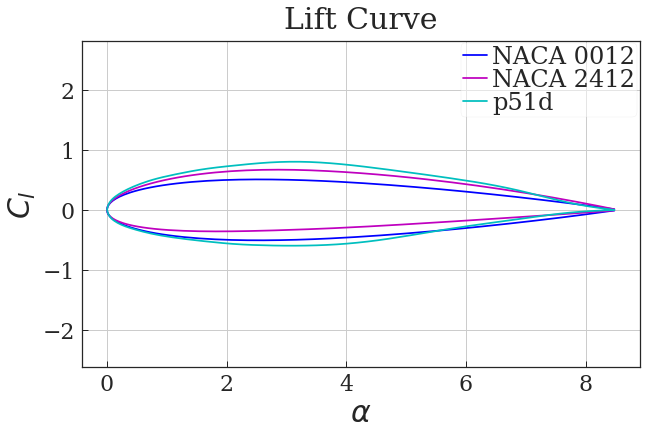

In [19]:
plt.figure(figsize=(10,6)) 
plt.plot(c*xgeom0012, c*ygeom0012, 'b-', label = 'NACA 0012')
plt.plot(c*xgeom2412, c*ygeom2412, 'm-', label = 'NACA 2412')
plt.plot(c*xgeomp51d, c*ygeomp51d, 'c-', label = 'p51d')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$C_l$')
plt.title('Lift Curve')
plt.axis('equal')
plt.legend()

From this we get an idea of how similar and different the shapes of each airfoil are from each other. We can see that the difference between the NACA airfoils is just the camber, while the p51d is much thicker and different shape overlap.

Below, the lift curve for all the airfoils are plotted together.

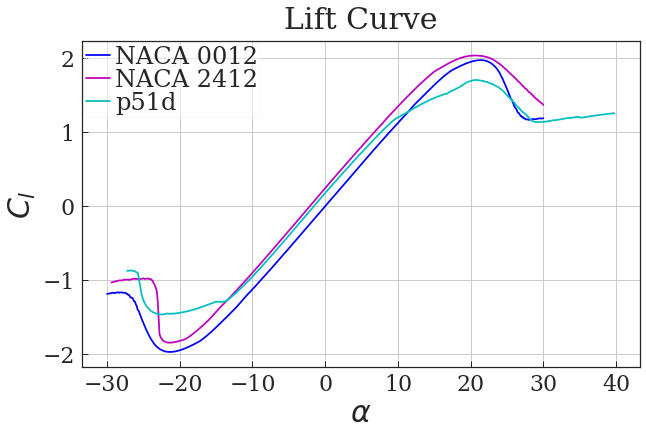

In [20]:
plt.figure(figsize=(10,6)) 
plt.plot(alp1, Clxfoil0012, 'b-', label = 'NACA 0012')
plt.plot(alp2,Clxfoil2412, 'm-', label = 'NACA 2412')
plt.plot(alp3,Clxfoilp51d, 'c-', label = 'p51d')
plt.xlabel(r'$\alpha$')
plt.ylabel(r'$C_l$')
plt.title('Lift Curve')
plt.legend()

From this graph we can see that the NACA 2412 airfoil has the highest $C_{l,max}$. The p51d has the lowest $C_{l,max}$, however, it has a much higher $C_l$ at $\alpha=0$ than the NACA 0012, and is almost as high as the NACA 2412.

Below, the drag polar of all three airfoils is ploted.

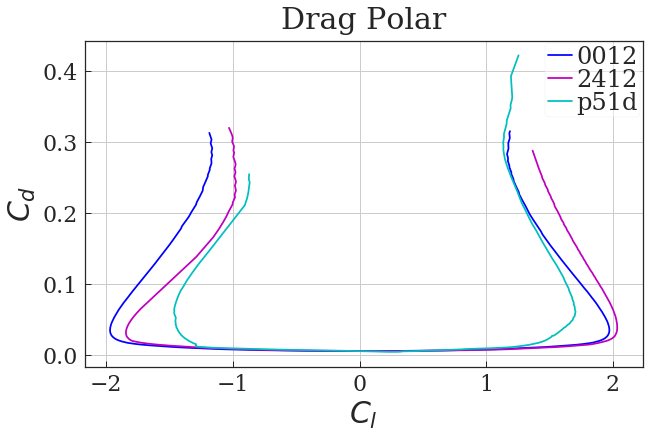

In [21]:
plt.figure(figsize=(10,6)) 
plt.plot(Clxfoil0012, Cdxfoil0012, 'b-', label = '0012')
plt.plot(Clxfoil2412,Cdxfoil2412, 'm-', label = '2412')
plt.plot(Clxfoilp51d,Cdxfoilp51d, 'c-', label = 'p51d')
plt.xlabel(r'$C_l$')
plt.ylabel(r'$C_d$')
plt.title('Drag Polar')
plt.legend()

From this graph we cannot really tell if any of them have a drag bucket or not. It looks as if between $-1\leq C_l \leq 1$ they all overlap. However, a clearer picture of this area is needed to analyze this better.

Next we zoom in between the ranges $-2\leq C_l \leq 2$ and $0\leq C_d \leq 0.025$.

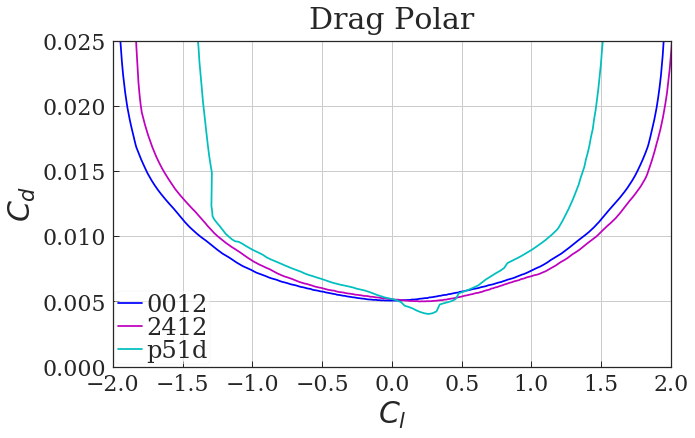

In [22]:
plt.figure(figsize=(10,6)) 
plt.plot(Clxfoil0012, Cdxfoil0012, 'b-', label = '0012')
plt.plot(Clxfoil2412,Cdxfoil2412, 'm-', label = '2412')
plt.plot(Clxfoilp51d,Cdxfoilp51d, 'c-', label = 'p51d')
plt.xlabel(r'$C_l$')
plt.ylabel(r'$C_d$')
plt.title('Drag Polar')
plt.ylim(0,0.025)
plt.xlim(-2,2)
plt.legend()

Here the shape of each airfoils drag polar is clearer. We can see that they are not in fact all overlapping, just kinda close to each other. It can also be seen that the only one that has a drag bucket is the p51d airfoil. The two NACA airfoils do not have a drag bucket. From this we can get that the p51d is more optimized for a specific ranges of $C_l$ while the other two are not. For a 3D wing, these $C_d$ values could become higher since there would be more factors such as downwash. The $C_l$ values would also decrease.

Below, the lift-to-drag ratio is plotted vs the AoA.

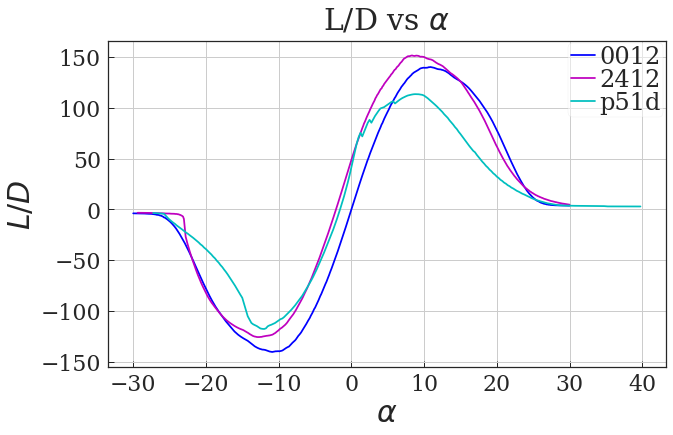

In [23]:
plt.figure(figsize=(10,6)) 
plt.plot(alp1,Clxfoil0012/Cdxfoil0012, 'b-', label = '0012')
plt.plot(alp2,Clxfoil2412/Cdxfoil2412, 'm-', label = '2412')
plt.plot(alp3,Clxfoilp51d/Cdxfoilp51d, 'c-', label = 'p51d')
plt.ylabel(r'$L/D$')
plt.xlabel(r'$\alpha$')
plt.title(r'L/D vs $\alpha$')
plt.legend()

From this graph, we can see that around $\alpha=0$, the p51d has a very high L/D, while the NACA 0012 is much lower, and the NACA 2412 is nearly the same. However, as $\alpha$ increases, both the NACA airfoils have a higher L/D. This then means that the p51d has much lower range of $\alpha$s were it is very effective.

Below, the flight parameters for level flight are calculated.

In [24]:
####################################### CRUISE ##########################################################
alpha_0012l = np.interp(Cl_cruise, Clxfoil0012, alp1)
alpha_2412l = np.interp(Cl_cruise, Clxfoil2412, alp2)
alpha_p51dl = np.interp(Cl_cruise, Clxfoilp51d, alp3)

Cd_0012l = np.interp(Cl_cruise, Clxfoil0012, Cdxfoil0012)
Cd_2412l = np.interp(Cl_cruise, Clxfoil2412, Cdxfoil2412)
Cd_p51dl = np.interp(Cl_cruise, Clxfoilp51d, Cdxfoilp51d)

LD_0012l = Cl_cruise/Cd_0012l
LD_2412l = Cl_cruise/Cd_2412l
LD_p51dl = Cl_cruise/Cd_p51dl

D_0012l = Cd_0012l * 0.5 *rho *Vinf**2 * S
D_2412l = Cd_2412l * 0.5 *rho *Vinf**2 * S
D_p51dl = Cd_p51dl * 0.5 *rho *Vinf**2 * S

Below, the flight parameters for the 2g turn are calculated.

In [25]:
####################################### 2G TURN ##########################################################
alpha_0012t = np.interp(Cl_2g, Clxfoil0012, alp1)
alpha_2412t = np.interp(Cl_2g, Clxfoil2412, alp2)
alpha_p51dt = np.interp(Cl_2g, Clxfoilp51d, alp3)

Cd_0012t = np.interp(Cl_2g, Clxfoil0012, Cdxfoil0012)
Cd_2412t = np.interp(Cl_2g, Clxfoil2412, Cdxfoil2412)
Cd_p51dt = np.interp(Cl_2g, Clxfoilp51d, Cdxfoilp51d)

LD_0012t = Cl_2g/Cd_0012t
LD_2412t = Cl_2g/Cd_2412t
LD_p51dt = Cl_2g/Cd_p51dt

D_0012t = Cd_0012t * 0.5 *rho *Vinf**2 * S
D_2412t = Cd_2412t * 0.5 *rho *Vinf**2 * S
D_p51dt = Cd_p51dt * 0.5 *rho *Vinf**2 * S

Below, the flight parameters for stall are calculated.

In [26]:
####################################### STALL ##########################################################
alpha_0012s = alp1[Clxfoil0012.idxmax()]
alpha_2412s = alp2[Clxfoil2412.idxmax()]
alpha_p51ds = alp3[Clxfoilp51d.idxmax()]

Cd_0012s = Cdxfoil0012[Clxfoil0012.idxmax()]
Cd_2412s = Cdxfoil2412[Clxfoil2412.idxmax()]
Cd_p51ds = Cdxfoilp51d[Clxfoilp51d.idxmax()]

LD_0012s = np.max(Clxfoil0012)/Cd_0012s
LD_2412s = np.max(Clxfoil2412)/Cd_2412s
LD_p51ds = np.max(Clxfoilp51d)/Cd_p51ds

D_0012s = Cd_0012s * 0.5 *rho *Vinf**2 * S
D_2412s = Cd_2412s * 0.5 *rho *Vinf**2 * S
D_p51ds = Cd_p51ds * 0.5 *rho *Vinf**2 * S

Below the flight parameters are tabulated for each airfoil in a different table.

In [27]:
data = [('Level Flight', alpha_0012l, Cl_cruise, D_0012l, LD_0012l),('2g Turn', alpha_0012t, Cl_2g, D_0012t, LD_0012t),('Stall', alpha_0012s, np.max(Clxfoil0012), D_0012s, LD_0012s)]
df1 = pd.DataFrame(data, columns=['NACA 0012', 'AoA (deg)', 'Cl','D (lbs)','L/D'])
df1.set_index('NACA 0012')

,AoA (deg),Cl,D (lbs),L/D
NACA 0012,,,,
Level Flight,1.980496,0.226697,212.630200,43.267607
2g Turn,3.968817,0.453394,229.504059,80.172874
Stall,21.343000,1.971800,1401.730120,57.087435


In [28]:
data = [('Level Flight', alpha_2412l, Cl_cruise, D_2412l, LD_2412l),('2g Turn', alpha_2412t, Cl_2g, D_2412t, LD_2412t),('Stall', alpha_2412s, np.max(Clxfoil2412), D_2412s, LD_2412s)]
df2 = pd.DataFrame(data, columns=['NACA 2412', 'AoA (deg)', 'Cl','D (lbs)','L/D'])
df2.set_index('NACA 2412')

,AoA (deg),Cl,D (lbs),L/D
NACA 2412,,,,
Level Flight,-0.152597,0.226697,203.319858,45.248900
2g Turn,1.832807,0.453394,214.159941,85.917095
Stall,20.621000,2.034500,1548.234050,53.328965


In [29]:
data = [('Level Flight', alpha_p51dl, Cl_cruise, D_p51dl, LD_p51dl),('2g Turn', alpha_p51dt, Cl_2g, D_p51dt, LD_p51dt),('Stall', alpha_p51ds, np.max(Clxfoilp51d), D_p51ds, LD_p51ds)]
df3 = pd.DataFrame(data, columns=['P51D', 'AoA (deg)', 'Cl','D (lbs)','L/D'])
df3.set_index('P51D')

,AoA (deg),Cl,D (lbs),L/D
P51D,,,,
Level Flight,0.430824,0.226697,166.994319,55.091694
2g Turn,2.472366,0.453394,209.546065,87.808855
Stall,20.750000,1.704800,2468.246263,28.030253


During level flight, the NACA 0012 has the greatest AoA. This is because it is a symmetrical airfoil that has an $\alpha_{L=0}=0$, while for a cambered airfoil, $\alpha_{L=0}<0$. 

The P51D would perform the best for both going as fast as possible at level flight and the 2g cruise because it has a greater $L/D$ and a lower $D$ than both other airfoils for both types of flight.

## Problem 2
### Methods 
For this problem, the provided code was used to make the shape, calculate the sectional lift distribution, and calculate the effective angle of attack distribution for each wing style. Pyxfoil was then used to calculate the 2-D lift and drag coefficients.

### Equations
Lifting Line Equations: In order to ta obtain an asnwer for the circulation, we need to iterate. We do this by first finding the induced angle of attack with a guess distribution, and then use SUR in iterations in order to obtain a converged circulation.

Induced Angle of Attack:
$$\alpha_i = \frac{1}{4\pi V_\infty} \int_{-b/2}^{b/2} \frac{\frac{d\Gamma}{d\xi}}{y_n - \xi}d\xi $$

Effective Angle of Attack:
$$\alpha_{eff}(y) = \alpha_{geom} - \alpha_i(y) - t(y)$$

New Circulation Distribution:
$$ \Gamma_{new}(y) = \frac{1}{2}V_\infty c(y)C_l(y)$$

Successive Under Relaxation:
$$ \Gamma_{new}(y) =  \Gamma_{old} + D(\Gamma_{new} - \Gamma_{old}) $$

After the circulation converged, $C_L$, $C_{D,i}$, and $C_{D,v}$ can be calculated.

Coefficient of Lift:
$$ C_L = \frac{2}{V_\infty S} \int_{-b/2}^{b/2} \Gamma(y)dy $$

Coefficient of Induced Drag:
$$ C_{D,i} = \frac{2}{V_\infty S} \int_{-b/2}^{b/2} \Gamma(y)\alpha_i(y)dy $$

Coefficient of Viscous Drag:
$$ C_{D,v} = \frac{2}{V_\infty S} \int_{-b/2}^{b/2} \Gamma(y)\alpha_i(y)dy $$

Coefficient of Drag:
$$ C_{D} = C_{D,i} + C_{D,v} $$

### Code and Results
### Lifting Line Data Class
This class below calculates the $a_i$, $a_{eff}$, runs through as many iterations until $\Gamma$ converges, and then calculates the $C_L$ and $C_D$. It also saves everything in files.

In [18]:
""" Class creator:
Logan Halstrom
EAE 127
UCD 

Edited:
Edgardo Rivera Godoy
12/10/18
"""

class Wing:
    """Stores information and solutions for a given wing"""
    def __init__(self, loadfile=''):
        """Initialize wing class.  Load results from file if filename specified
        """
        if loadfile != '':
            #LOAD SAVED RESULTS, IF SPECIFIED
            self.LoadData(loadfile)
        else:
            #MAKE SAVE DIRECTORIES IF THEY IF IT DOES NOT EXIST

            try:
                #object save directory
                os.mkdir('objs')
            except Exception:
                pass

            #path to object save location
            self.savedir = 'Results'
            try:
                #results save directory
                os.mkdir(self.savedir)
            except Exception:
                pass

    def init(self, name, Vinf, rho, a, S, b, c, polars, t=0, yfoil=0):
        """Create class from scratch (dont load data)
        name --> wing name list (1st element is title name, 2nd is filename)
        Vinf --> freestream velocity (for non-dimensionalization)
        rho --> freestream density (for non-dimensionalization)
        a --> geometric alpha [deg] of wing
        b --> wingspan
        c --> chord distribution (# points is # spanwise stations, use odd #)
        polars --> polars associated with airfoils in wing.  List of polar
                    classes if blended wing, or single polar class if
                    constant airfoil
        t --> wing geometric twist distribution (default=0, otherwise list)
        yfoil --> list that specifies spanwise location of different airfoils.
                    Each entry indicates the length of the airfoil distribution
                    (i.e. first airfoil: y/b/2=0 --> yfoil[0],
                    2nd foil y/b/2=0.5 --> yfoil[1])
        """
        #GENERAL WING INFO
        self.name = name
        #freestream velocity
        self.Vinf = Vinf
        #freestream density
        self.rho = rho
        #angle of attack
        self.SetAoA(a)

        #WING GEOMETRY
        #wing span
        self.b = b
        #chord distribution
        self.c = c
        #points in spanwise direction (same and number of chord points)
        self.ny = len(self.c)
        if self.ny%2 == 0:
            sys.exit('\n\nWARNING: NUMBER OF SPANWISE STATIONS MUST BE ODD\n\n')
        #root chord index (for odd # of points)
        self.iroot = int( (self.ny - 1) / 2 + 1 - 1 )
        #non-dimensional wingspan vector
        self.y = np.linspace(-self.b/2., self.b/2., self.ny)
        self.dy = self.y[1] - self.y[0]
        #wing area
        self.S = S
        #twist distribution (positive rotates wingtip upward)
        if type(t) == int or type(t) == float:
            self.t = np.ones(self.ny) * t
        else:
            self.t = t

        #Airfoil dististribution (blending)
        if yfoil == 0:
            #only one airfoil in wing, make list of zeros (1st index)
            self.yfoil = np.zeros(self.ny)
        else:
            #multiple airfoils
            #list same length as y, contains index of polar of each airfoil used
            #as each y location

            #Start in center of wing, moving right (mirror later)
            self.yfoil = []
            ind = 0 #index of current airfoil polar
            for y in self.y[self.iroot:]:
                #if current locaiton is new airfoil, change foil index
                if y >= yfoil[ind+1]:
                    ind += 1 #toggle airfoil polar index
                self.yfoil.append( ind )
            #Mirror yfoil for left side of wing
            self.yfoil = np.array(list(self.yfoil[::-1][:-1])
                                + list(self.yfoil))

        #AERODYNAMC PROPERTIES
        #polars of each airfoil used (list)
        if type(polars) != list:
            polars = [polars]
        self.polars = polars

        #Initial root circulation guess (elliptic)
        Gam0 = np.pi * self.c[self.iroot] / (1 + np.pi * self.c[self.iroot]/2)
        #Initial circulation distribution (elliptic)
        self.Gam = Gam0 * np.sqrt(1 - (2*self.y / self.b)**2)
        #self.Gam = 1 - np.linspace(0, 1, self.ny) #linear guess


        #DEBUG SETTINGS
        #indices for distribution integration to determin lift/drag
        intinds = [int(x) for x in np.linspace(0, self.ny-1, self.ny)] #all indices
#         intinds = intinds[1:-1] #exclude wingtips
        # intinds = intinds[3:-3] #exclude 2 points at wingtip for centeral diff?
        self.intinds = intinds

        #INITIALIZE ITERATION PARAMETERS
        #old circulation dist in iteration
        self.Gamold = np.zeros(self.ny)
        #vorticity distribution
        self.dGdy = np.zeros(self.ny)
        #number of iterations in solution
        self.iter = 0
        #induced AoA dist
        self.ai = np.zeros(self.ny)
        #effective AoA dist
        self.aeff = np.zeros(self.ny)
        #downwash dist
        self.w = np.zeros(self.ny)
        #section Cl dist
        self.Cl = np.zeros(self.ny)
        #section lift dist
        self.Lpr = np.zeros(self.ny)

        #3D TERMS
        self.CL = 0
        self.L = 0
        self.CDi = 0
        self.Di = 0

    def FileName(self, ext='obj'):
        """Make savename
        name --> additional save name text
        ext --> file extension
        """
        return MakeFileName(int(self.S), self.b, self.a_deg, self.name[1], ext)

    def SaveData(self):
        """Save wing data to file
        """
        savename = MakeFileName(int(self.S), self.b, self.a_deg, self.name[1], 'obj')
        f = open('{}'.format(savename), 'wb')
        pickle.dump(self.__dict__, f, pickle.HIGHEST_PROTOCOL)
        f.close()

    def LoadData(self, savename):
        """load wing data from file
        """
        #print('loading {}'.format(savename))
        f = open('{}'.format(savename), 'rb')
        tmpdic = pickle.load(f)
        f.close()
        self.__dict__.update(tmpdic)

    def SetAoA(self, alpha):
        """Change geometric angle of attack"""
        #geometric AoA [deg]
        self.a_deg = alpha
        #geometric AoA [rad]
        self.a = self.a_deg*np.pi/180

    def InducedAoA(self):
        """Integrate circulation along wingspan to calculate induced AoA
        Used induced AoA to calculate effective AoA and downwash
        """

        def wInt(i, j):
            """The integral in the downwash equation. i is index of point where
            downwash is being calculated, j is index of trailing vortex whose
            effect we are calculating
            """
            return self.dGdy[j] / (self.y[i] - self.y[j])

        #DUMMY VARIABLE INTEGRATION

        #dummy variable of integration (halfway between real wing points)
        xi = [y + self.dy/2 for y in self.y]

        #dummy integration needs zero circulation at wingtips
        self.Gam[0], self.Gam[-1] = 0, 0

        #d/dy(Gamma) (forward diff in y is central diff in xi)
        for i in range(0, self.ny-1):
            # self.dGdy[i] = (self.Gam[i+1] - self.Gam[i]) / (self.dy)
            self.dGdy[i] = (self.Gam[i+1] - self.Gam[i]) / (self.y[i+1] - self.y[i])

        #For each spanwise location, sum effects of each horseshoe vortex
        for i in range(0, self.ny):
            #each horseshoe's effect is an integral
            integ = np.zeros(self.ny)
            for j, (y, g) in enumerate(zip(xi, self.dGdy)):
                integ[j] = g / (self.y[i] - y)
            #integrate effect of each horseshoe at i point
                #exclude endpoint, which is beyond right wingtip
            J = np.trapz(integ[:-1], xi[:-1])

            #induced AoA
            self.ai[i] = 1/(4*np.pi*self.Vinf) * J

        # Smooth induced angles of attack
        self.ai[0]  = 2*self.ai[1]  - self.ai[2]
        self.ai[-1] = 2*self.ai[-2] - self.ai[-3]

        for i in range(0, self.ny):
            #effective AoA
            self.aeff[i] = self.a - self.ai[i] + self.t[i]
            #downwash dist
            self.w[i] = -self.Vinf * self.ai[i]


    def LiftDist(self):
        """Get section lift distribution from airfoil polar and
        effective AoA distribution.  Get sectional lift force from
        Kutta-Joukowski Lift Theorem"""
        #save old solution
        self.Gamold = np.array(self.Gam)


        #for each effective AoA, find Cl from sectional data
        for i, aeff in enumerate(self.aeff):
            #INTERPOLATE SECTION CL
            #polar for current wing section
            polar = self.polars[ int(self.yfoil[i]) ]
            #interpolate Cl from section lift curve based on current aeff (rad)
            self.Cl[i] = polar.InterpCl(aeff)

        for i, aeff in enumerate(self.aeff):
            #SECTION LIFT
            self.Lpr[i] = 0.5 * self.rho * self.Vinf**2 * self.c[i] * self.Cl[i]
            #NEW CIRCULATION DISTRIBUTION (KJ THM)
            self.Gam[i] = 0.5 * self.Vinf * self.c[i] * self.Cl[i]

    def IterateWing(self, maxiter, maxres, damp, 
                    quiet=False, showfig=False):
        """Iterate wing circulation distribution until the residual is within
        acceptable bounds.  Use Successive Under Relaxation (SUR) iterative
        method.
        maxiter --> maximum number of iterations
        maxres --> maximum size of residual that will be accepted
        damp --> iteration damping factor
        quiet --> no screen output if True
        showfig --> plot each iterative result for circulation on same plot
        """

        #RESET CIRCULATION GUESS
        #Initial root circulation guess (elliptic)
        Gam0 = np.pi * self.c[self.iroot] / (1 + np.pi * self.c[self.iroot]/2)
        #Initial circulation distribution (elliptic)
        self.Gam = Gam0 * np.sqrt(1 - (2*self.y / self.b)**2)

        #SAVE GUESS
        convhist = {'iter' : [], 'y_norm' : self.y/(self.b/2),  'Gam' : [], 'Gam_norm' : []}
        convhist['iter'].append(0)
        convhist['Gam_norm'].append(list(self.Gam/max(self.Gam))) #normalized
        convhist['Gam'].append(list(self.Gam))               #non-normalized

        if not quiet:
            print('Beginning Iteration...')


        iter = 1
        res = maxres+1
        j  = 0
        while iter < maxiter and j < 5:
            #CALC NEW CIRCULATION DITRIBUTION
            self.InducedAoA()
            self.LiftDist()
            #CALC RESIDUAL (difference between current and prev solution)
            R = self.Gam - self.Gamold
            
            #percent works much better
            R = R[5:-5] / self.Gamold[5:-5]

            res = max(abs(R)) #check convergence along entire wing
            # res = abs(R[self.iroot]) #only check root circulation convergence

            #stop iteration when residual has been less than maxres for 5 iters
            if res < maxres:
                j += 1
                # j = 5 #skip the 5 steps after residual

            #SAVE NEW CIRCULATION DISTRIBUTION (use SUR)
            self.Gam = self.Gamold + damp * (self.Gam - self.Gamold)


            #SAVE CONVERGENCE HISTORY
            convhist['iter'].append(iter)
            convhist['Gam_norm'].append(list(self.Gam/max(self.Gam))) #normalized
            convhist['Gam'].append(list(self.Gam))               #non-normalized

            #increment iteration count
            iter += 1

        self.iter = iter - 1 #save final iteration count
        ires = np.where( R == max(abs(R)) )
        self.maxresloc = self.y[ires]
        if not quiet:
            print('Iteration Complete! (iters={}, res={}, maxresloc={})'.format(
                    self.iter,res, self.maxresloc/(self.b/2)) )

        if showfig:

            plt.figure()
            plt.title('Circulation iter=%s'%(self.iter))
            plt.xlabel(r'$\frac{y}{b/2}$')
            plt.ylabel(r'$\frac{\Gamma}{\Gamma_0}$')
            #plot actual or normalized gamma
            ykey = 'Gam_norm'
            ykey = 'Gam'
            #plot other iters
            for yy in convhist[ykey][1:-1]:
                plt.plot(convhist['y_norm'], yy)
            #plot first iter as black, thick line
            plt.plot(convhist['y_norm'], convhist[ykey][0], color='black', linewidth=3, linestyle='--',)
            #plot last iter
            plt.plot(convhist['y_norm'], convhist[ykey][-1], color='black', linewidth=3)

            plt.show()

    def GetLift(self):
        """Calculate 3D lift of wing from ciruclation distribution.
        Only integrate inboard points, exclude wingtips
        Note: Integration indices are set in class initialization function
        """
        #function to integrate
        f = self.Gam[self.intinds]
        #variable to integrate against
        dx = self.y[self.intinds]
        #integration expression
        self.CL = 2 / (self.Vinf * self.S) * np.trapz(f, dx)
        self.L = self.CL * 0.5 * self.rho * self.Vinf ** 2 * self.S

    def GetDrag(self):
        """Calculate induced drag of wing from ciruclation distribution
        Note: Integration indices are set in class initialization function
        """
        #Freestream dynamic pressure
        qinf = 0.5 * self.rho * self.Vinf ** 2

        #INDUCED DRAG (FROM LIFT DISTRIBUTION)
        #function to integrate
        f = self.Gam[self.intinds] * np.sin(self.ai[self.intinds])
        #variable to integrate against
        dx = self.y[self.intinds]
        #integration expression
        self.CDi = (2 / (self.Vinf * self.S) * np.trapz(f, dx))
        self.Di = self.CDi * qinf * self.S

        #VISCOUS DRAG (FROM SECTIONAL VISCOUS DRAG)
        #Get sectional viscous drag force
        dv = np.zeros(self.ny) #2D viscous drag
        for i, aeff in enumerate(self.aeff):
            #polar for current wing section
            polar = self.polars[ int(self.yfoil[i]) ]
            #interoplate 2D viscous drag coefficient for current wing section
            Cdv = polar.InterpCd(aeff)
            #Convert to drag force for integration
            dv[i] = Cdv * qinf * self.c[i]
        #Integrate to get total drag force
        self.Dv = np.trapz(dv, x=self.y)
        #Convert to drag coefficient
        self.CDv = self.Dv / (qinf * self.S)

        #TOTAL 3D DRAG IS INDUCED + VISCOUS
            #NOTE: both drag forces have been non-dim. by the same parameters,
            #thus, they can be summed in coefficient form
        self.CD = self.CDi + self.CDv

    def GetLiftDist(self, maxiter=300, maxres=1e-4, damping=0.05, showfig=False, overwrite=True):
        """Calculate lift/circulation distribution of given wing and given
        angle of attack
        """
        #CHECK IF ALREADY SOLVED FOR
        wingname = self.FileName() #current object file name
        if not os.path.isfile(wingname) or overwrite:
            #all other wings require iteration
            self.IterateWing(maxiter, maxres, damping, showfig=showfig)

            #CALCULATE AERODYANAMIC FORCES
            self.GetLift()
            self.GetDrag()
            self.SaveData()
        else:
            #LOAD WING DATA FROM FILE
            self.LoadData(wingname)

    def AlphaSweep(self, alphas=np.linspace(0,20,10), overwrite=True,
                    maxiter=300, maxres=1e-4, damping=0.05,):
        """Solve flow over a wing at various angles of attack.
        If an angle of attack for this wing has already been solved and saved
        as a pickled object, load this data rather than calculating it.
        self --> wing object
        alphas --> list of geometric angles of attack to run
        overwrite --> overwrite existing wing objects
        """
        #STORE 3D POLAR VARIABLES AS LISTS IN DATAFRAME
        polar = pd.DataFrame()

        #SOLVE WING FOR EACH ALPHA
        for alpha in alphas:
            #Set current AoA to find coefficients for
            self.SetAoA(alpha)

            #SOLVE WING FOR GIVEN AOA IF NO SAVED FILE
            #Reiterate lift distribution
            self.GetLiftDist(maxiter=maxiter, maxres=maxres,
                        damping=damping, overwrite=overwrite)

            #SAVE POLAR DATA
            #add global results for current geometric AoA to new data row
            s = pd.Series()
            s['alpha'    ] = alpha * np.pi / 180
            s['alpha_deg'] = alpha
            s['CL'       ] = self.CL
            s['CD'       ] = self.CD
            s['CDi'      ] = self.CDi
            s['CDv'      ] = self.CDv
            #save to dataframe
            polar = polar.append(s, ignore_index=True)

        #SAVE DATA
        savename = '{}/{}_polar.dat'.format(self.savedir, self.name[1])
        polar.to_csv(savename, sep=' ', index=False)

        return polar

    def Wing2df(self, ):
        """Convert spanwise properties from object variables to single dataframe
        """
        df = pd.DataFrame()
        
        #step through each item in object dictionary
        for key, val in self.__dict__.items():
            #don't save any strings
            if type(val) != str:
                #only save items that have a length (no integers/floats/objects)
                try:
                    length = len(val)
                    #if length of item is same as wingspan properties, save
                    if length == self.ny:
                        df[key] = val
                except:
                    pass
                
        return df
    
    def PlotWing(self, color):
        """Plot wing planform geometry.
        Assumes chord distribution is symmetric about x=0.
        color --> line color
        """
        #plot leading edge
        handle, = plt.plot(self.y, self.c/2, color=color)
        #plot trailing edge
        plt.plot(self.y, -self.c/2, color=color,label='_nolegend_')
        #plot left wing end
        plt.plot([self.y[0], self.y[0]], [-self.c[0]/2, self.c[0]/2],
                                                            color=color,label='_nolegend_')
        #plt right wing end
        plt.plot([self.y[-1], self.y[-1]], [-self.c[-1]/2, self.c[-1]/2],
                                                            color=color,label='_nolegend_')
        return handle

    def PlotDistProps(self, showplot=False):
        """Plot wingspan distribution properties (induced alpha, circulation,
            downwash, etc.
        """
        #Plot Wing Dist Properties
        f, axarr = plt.subplots(5, sharex=True, figsize=[7, 10])
        #PLOT CIRCULATION DISTRIBUTION
        #axarr[0].set_title(r'$\Gamma$')
        yy = self.y / (self.b / 2)
        axarr[0].plot(yy,self.Gam, label=r'$\Gamma$', marker='.',)
        axarr[0].set_ylabel(r'$\Gamma$')
        #PLOT VORTICITY DIST
        #axarr[1].set_title(r'$d\Gamma/dy$', fontdict=font_ttl)
        axarr[1].plot(yy,self.dGdy, label=r'$\frac{d\Gamma}{dy}$'
                            , marker='.',)
        axarr[1].set_ylabel(r'$d\Gamma/dy$')
        #PLOT DOWNWASH
        #axarr[2].set_title('Downwash', fontdict=font_ttl)
        axarr[2].plot(yy,self.w, label = 'w', marker='.',)
        axarr[2].set_ylabel('Downwash')
        #PLOT INDUCED ANGLE OF ATTACK
        #axarr[3].set_title(r'$\alpha_i$', fontdict=font_ttl)
        axarr[3].plot(yy,self.ai*180/np.pi, label=r'$\alpha_i$',
                            marker='.',)
        axarr[3].set_ylabel(r'$\alpha_i$')
        #PLOT EFFECTIVE ANGLE OF ATTACK
        #axarr[4].set_title(r'$\alpha_{eff}$', fontdict=font_ttl)
        axarr[4].plot(yy,self.aeff*180/np.pi, label=r'$\alpha_{eff}$',
                            marker='.',)
        axarr[4].set_ylabel(r'$\alpha_{eff}$')
        #axarr[4].legend(bbox_to_anchor=(1.01, 0.5), loc='center left',
                    #fontsize='large',
                    ##fancybox=True, frameon=True,
                    #framealpha=0.75,
                    #numpoints=1, scatterpoints=1,
                    #borderpad=0.1, borderaxespad=0.1, handletextpad=0.2,
                    #handlelength=1.0, labelspacing=0,
                    #)
        axarr[4].set_xlabel(r'$\frac{y}{b/2}$')
#         SavePlot( '{}/{}_Distributions.{}'.format(savedir, self.name[1], pictype) )
        if showplot:
            plt.show()

def MakeFileName(S, b, alpha, name, ext='dat'):
        """Make filename for saving wing objects with pickle. Savename of form:
        'savedir/Sxxxbxxxaxxx_name.filetype'
        name --> additional save name text
        ext --> file extension
        """
        return 'objs/S{}b{}a{}_{}.{}'.format( S, b, alpha, name, ext)

### Polar Data Class

The ellipse function calculates the elliptical shape. The elliwing uses this to create an elliptical wing.

In [19]:
""" Functions creator:
Logan Halstrom
EAE 127
UCD  
"""

def Ellipse(x, a, b):
    """Equation for upper surface of ellipse (negate result for lower surface.)
    a --> major axis (longest distance in the ellipse, not divided by 2)
    b --> minor axis (shortest distance in the ellipse, not divided by 2)
    (For elliptic wing, enter wingspan vector (y) for x,
    half of the wingspan for a, and half of the root chord for b)
    """
    #make semi axes (half)
    a = a / 2
    b = b / 2
    #equation for ellipse
    return b * np.sqrt( 1 - (x / a) ** 2 )

def ElliWing(b, S, ny=101):
    """Return elliptic wing parameters
    b --> wingspan
    S --> wing area
    ny --> number of points in spanwise direction
    """
    #spanwise location
    y = np.linspace(-b/2, b/2, ny)
    #root chord
    croot = (4 * S) / (np.pi * b)
    #Elliptic Chord Distribution (chord is evenly distributed about y,hence *2)
    c = 2 * Ellipse(y, b, croot)
    #Elliptic Root Circulation
    Gam0 = np.pi * croot / (1 + np.pi * croot/2)
    #Elliptic Circulation Distribution
    EliGam = Gam0 * np.sqrt(1 - (2*y / b)**2)
    return y, c, EliGam


Trapwing then does the same thing as elliwing but with a trapezoidal shape.

In [20]:
""" Functions creator:
Logan Halstrom
EAE 127
UCD  
"""

def Trapezoid(y, a, b, h):
    """Return equation for a trapezoid centered about y=0
    a --> long horizontal
    b --> short horizontal side
    h --> height of trap
                               b = ctip/2
                             _____
                             |    \
                             |     \
                     h = b/2 |      \
                             |       \
                 y=0  ------ |--------\
                                a = croot/2
                             |
                             |
                            x=0

    """
    m = (a - b) / h
    x = a - abs(m * y)
    return x

def TrapWing(b, S, croot, ny=101):
    """Return trapezoidal wing with given parameters
    b --> wingspan
    S --> wing area
    croot --> root chord length
    ny --> number of points in spanwise direction
    """
    #spanwise location
    y = np.linspace(-b/2, b/2, ny)
    #tip chord
    ctip = (2 * S) / b - croot
    #Trapezoidal Chord Distribution
    #(chord is evenly distributed about y, hence *2)
    c = 2 * Trapezoid(y, croot/2, ctip/2, b/2)
    return y, c

The following function will return the angle of every wing station such that the tips have been rotated by the angle *ang* (negative angles mean downward rotation from the root).

In [21]:
""" Functions creator:
Logan Halstrom
EAE 127
UCD  
"""
def washout(ang, ny):
    """Return a twist angle distribution discribing rotation of the wingtip
    by a given angle relative to the wing root
    ang --> angle of twist, postitive = wingtip up (degrees, convert to rad)
    ny  --> number of spanwise stations, must be odd
    """

    #convert twist to radians
    ang *= np.pi / 180
    #Twist distribution of right half of wing only (zero to ang)
    twist = np.linspace(0, ang, (ny-1)/2+1)
    #reflect for left half of wing
    twist = np.array( list(twist[::-1][:-1]) + list(twist) )
    return twist

### Main Function for Calculating Lift Distributions

Use to calculate lift distribution and 3D aero coefficients for a given wing planform at a given angle of attack.

In [22]:
""" Functions creator:
Logan Halstrom
EAE 127
UCD  
"""
def LiftingLineMain(name, airfoils, S, b, c, t=0, alpha=0, Vinf=1, rhoinf=1,
                        maxiter=300, maxres=1e-4, damping=0.05, overwrite=True):
    """Simulate flow over a finite wing of given parameters.
    name --> name of wing (used for file name and plotting label purposes)
    airfoils --> list of airfoil section file names to use
    S --> wing area
    b --> wing span
    c --> spanwise chord distribution, give number of spanwise stations
    t --> twist distribution
    alpha --> angle of attack to compute lifting line calcs at
    Vinf --> used in non-dimensionalizing coefficients
    rhoinf --> used in non-dimensionalizing coefficients
    maxiter --> iteration limit for lifting line convergence
    maxres --> maximum allowable residual for convergence
    damping -- SUR damping ratio
    """

    #READ POLAR DATA FOR WING
    if type(airfoils) != list:
        #singe airfoil for entire wing
        airfoils = [airfoils]
    polars = []
    for i, foil in enumerate(airfoils):
        #read each polar for each cross-section that will be in wing
        polars.append( Polar(foil, 'Data/{}.polar.dat'.format(foil)) )

    #INITIALIZE WING OBJECT
    wing = Wing()
    wing.init(name, Vinf, rhoinf, alpha, S, b, c, polars, t=t, yfoil=0)

    #SOLVE LIFT DISTRIBUTION OVER WING
    wing.GetLiftDist(maxiter, maxres, damping, showfig=False, overwrite=overwrite)
    
    return wing

In [23]:
""" Class creator:
Logan Halstrom
EAE 127
UCD  

Edited:
Edgardo Rivera Godoy
12/10/18
"""
class Polar:
    """Stores polar data for airfoils"""

    def __init__(self, name, pol):
        """Can manually create polar data by providing alpha and Cl arrays.
        Otherwise, enter default and load XFOIL data with later function
        name --> polar name
        pol --> path to polar file or dataframe of polar data
        """
        #text name of polar
        self.name = name

        if type(pol) == str:
            #if polar path specified, read polar data from file
            self.ReadXfoilPolar(pol)
        else:
            #If polar data specified, save

            #rename AoA degrees
            pol['alpha_deg'] = pol['alpha']
            #AoA in radians
            pol['alpha'] = pol['alpha_deg'] * np.pi / 180
            #save polar to object
            self.polar = pol.copy()

    def ReadXfoilPolar(self, ifile):
        """Reads XFOIL polar output. Alpha and Cl ready automatically.
        Other info is optional and read if specified in function input
        ifile --> path of input file (string)
        Cd    --> read drag coefficient if for Cd=1
        """
        #Read Xfoil Polar
        df = pd.read_csv(ifile, delim_whitespace=True, skiprows=12,
            names=['alpha_deg', 'Cl', 'Cd', 'Cdp', 'Cm', 'Top_Xtr', 'Bot_Xtr'])
        #Downselect columns
        df = df[['alpha_deg', 'Cl', 'Cd', 'Cm',]]
        #AoA in radians
        df['alpha'] = df['alpha_deg'] * np.pi / 180
        self.polar = df

    def InterpCl(self, alpha):
        """Interpolate Cl for given alpha (in radians)
        """
        return np.interp(alpha, self.polar['alpha'], self.polar['Cl'])

    def InterpCd(self, alpha):
        """Interpolate Cd for given alpha (in radians)
        """
        return np.interp(alpha, self.polar['alpha'], self.polar['Cd'])

    def LiftCurve(self):
        """Plot lift curve of polar"""
        plt.figure()
        plt.title(self.name[0] + ' Lift Curve')
        plt.xlabel(r'$\alpha [deg]$')
        plt.ylabel(r'$C_l$')
        plt.plot(self.polar['alpha']*180/np.pi, self.polar['Cl'])
        # plt.show()

The code below sets up the parameters needed for the wings. It also finds the $\Gamma$, $C_L$, $C_{D,i}$, $C_{D,v}$, $C_{D}$, $\alpha_i$ and $\alpha_{eff}$ for the elliptical wing.

In [24]:
#WING SETTINGS
S = 235 #ft^2
croot = 8.48 #ft
b = 50 #ft
Vinf = 350 #mph
Vinf = Vinf*1.46667
h = 19000 #ft
W = 9200 #lbs
mu = 3.25e-7 #slugs/ft s
rhoinf = 1.3107e-3 # slugs/ft^3

Re = rhoinf*Vinf*c/mu

#Wing Name (list, first entry is plot title name, second is file name)
wingname = ['Elliptic Wing', 'elli']

#Airfoil name 
foil = ['p51d']
#Number of Spanwise Stations (Odd Number)
ny = 101
#Aspect Ratio
AR = b**2 /S
#Elliptic Wing Chord Distribution
y, c, _ = ElliWing(b, S, ny)
#Twist Distribution (zero means untwisted)
t = np.zeros(ny)

#Geometric Angle of Attack
alpha = 5

#Iteration Parameters
maxiter, maxres, damping = 800, 1e-4, 0.05 

#CALL MAIN FUNCTION
elliwing = LiftingLineMain(wingname, foil, S, b, c, t, alpha, Vinf, rhoinf,
                            maxiter, maxres, damping)

Beginning Iteration...
Iteration Complete! (iters=166, res=7.654771579573684e-05, maxresloc=[-1.   0.8])


The code below runs iterations to find the $\Gamma$, $C_L$, $C_{D,i}$, $C_{D,v}$, $C_{D}$, $\alpha_i$ and $\alpha_{eff}$ for a rectangular wing.

In [25]:
#Wing Name (list, first entry is plot title name, second is file name)
wingname = ['Rectangular Wing', 'rec']

#Rectangular Wing Chord Distribution
c = np.ones(ny)*S/b
#Twist Distribution (zero means untwisted)
t = np.zeros(ny)

#CALL MAIN FUNCTION
recwing = LiftingLineMain(wingname, foil, S, b, c, t, alpha, Vinf, rhoinf,
                            maxiter, maxres, damping)

Beginning Iteration...
Iteration Complete! (iters=167, res=7.627900698512994e-05, maxresloc=[-0.1])


The code below runs iterations to find the $\Gamma$, $C_L$, $C_{D,i}$, $C_{D,v}$, $C_{D}$, $\alpha_i$ and $\alpha_{eff}$ for a trapezoidal wing.

In [26]:
#Wing Name (list, first entry is plot title name, second is file name)
wingname = ['Trapezoidal Wing', 'trap']

#Elliptic Wing Chord Distribution
y, c = TrapWing(b, S, croot, ny=101)
#Twist Distribution (zero means untwisted)
t = np.zeros(ny)

#CALL MAIN FUNCTION
trapwing = LiftingLineMain(wingname, foil, S, b, c, t, alpha, Vinf, rhoinf,
                            maxiter, maxres, damping)

Beginning Iteration...
Iteration Complete! (iters=173, res=7.666257913181789e-05, maxresloc=[-1.   0.8])


The code below then plots all the wings together.

(-27.5, 27.5, -4.664000000000001, 4.664000000000001)

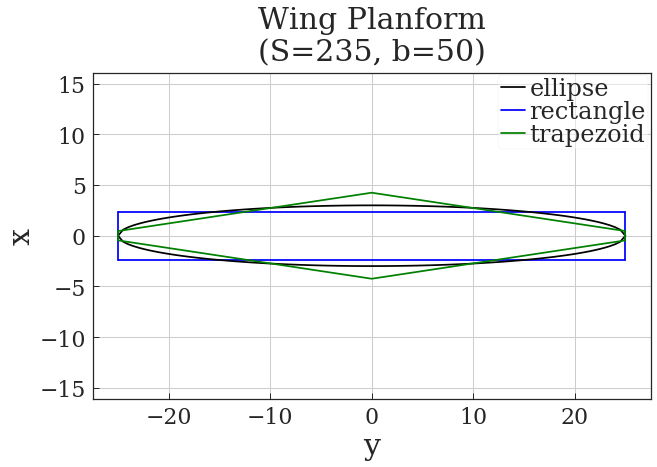

In [27]:
#PLOT WING GEOMETRY
plt.figure(figsize=(10,6))
plt.title('Wing Planform\n(S={}, b={})'.format(S, b))
plt.xlabel('y')
plt.ylabel('x')
r = recwing.PlotWing('blue')
e = elliwing.PlotWing('black')
t = trapwing.PlotWing('green')
plt.legend((e,r,t),['ellipse','rectangle','trapezoid'])
plt.axis('equal')

As can be seen above, they all have the exact same wingspan. The shape then dictates that the difference between them all is the chord along y. At the root, the trapezoidal wing has the biggest $c_{root}$. Although the $c$ is zero for the elliptical wing at the tips, for the majority of half wing closer to the tip, the trapezoidal has a smaller $c$.

Below the sectional lift distribution is plotted.

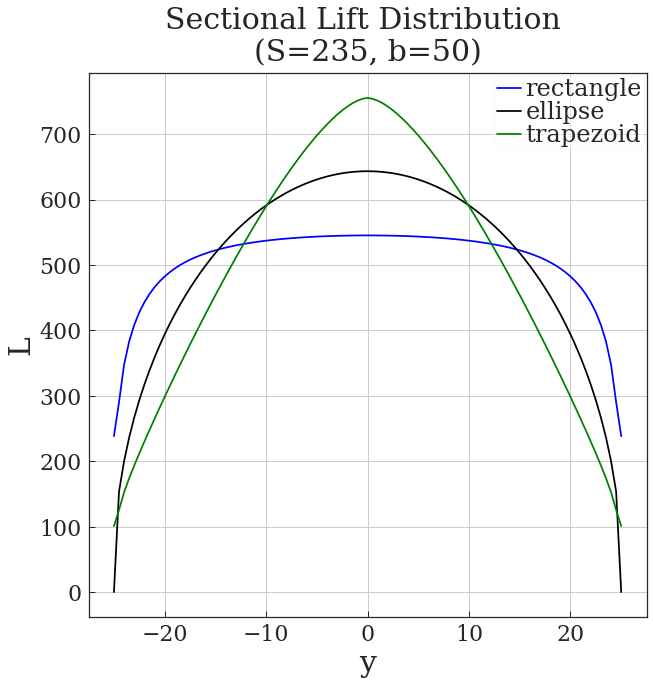

In [28]:
plt.figure(figsize=(10,10))
plt.title('Sectional Lift Distribution \n(S={}, b={})'.format(S, b))
plt.plot(recwing.y,recwing.Lpr,color='blue',label='rectangle')
plt.plot(elliwing.y,elliwing.Lpr,color='black',label='ellipse')
plt.plot(trapwing.y,trapwing.Lpr,color='green',label='trapezoid')
plt.xlabel('y')
plt.ylabel('L')
plt.legend()

Here we can see that the ellipse has a lift of zero at the tips. This is great because it means there will be much less drag since the induced drag should be decreased. It can also be seen that the lift distribution is very elliptical. For the Trapezoidal wing, however, the lift at the tips is not zero, so induced drag will not be decreased as much. That being said, lift generation is lower than the elliptical wing for the majority of half of the wing. This then means that it could have better roll control.

Below the effective angle of attack distribution was plotted.

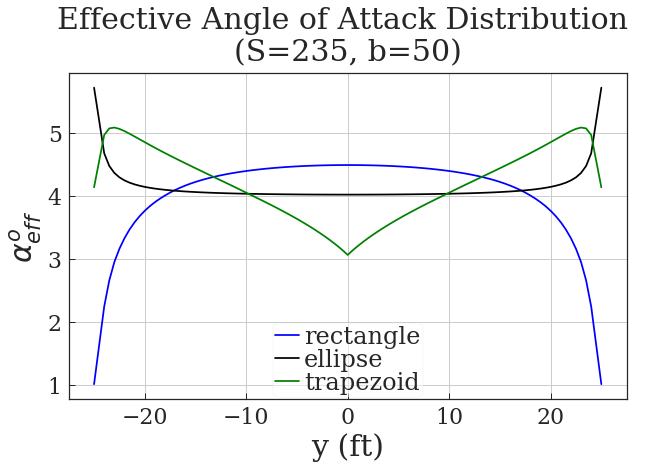

In [29]:
plt.figure(figsize=(10,6))
plt.title('Lift \n(S={}, b={})'.format(S, b))
plt.plot(recwing.y,recwing.aeff*180/np.pi,color='blue',label='rectangle')
plt.plot(elliwing.y,elliwing.aeff*180/np.pi,color='black',label='ellipse')
plt.plot(trapwing.y,trapwing.aeff*180/np.pi,color='green',label='trapezoid')
plt.title('Effective Angle of Attack Distribution \n(S={}, b={})'.format(S, b))
plt.xlabel('y (ft)')
plt.ylabel(r'$\alpha_{eff}^{o}$')
plt.legend()

All of the end points for these distributions should be ignored. For example, the distribution of the ellipse is known to bea flat line, however, because of numerics it is not entirely flat at the endpoints. Therefore we ignore the endpoints in this analysis. For the elliptical wing, we see that the $\alpha_{eff}$ is constant at $4^o$. The trapezoidal wing, however, is not constant. It actually starts with a high $\alpha_{eff}$ at the wintips and then constantly decreases as you go closer to the root.







Below, the polar of each wing is obtained. After running once, overwrite was set to twice in order to reduce computing time.

In [30]:
# List of AoA to simulate
alphas = np.linspace(0,30,50)
#Run all AoA
polar3Delli = elliwing.AlphaSweep(alphas, overwrite=False,
            maxiter=maxiter, damping=damping, maxres=maxres)

In [31]:
#Run all AoA
polar3Drec = recwing.AlphaSweep(alphas, overwrite=False,
            maxiter=maxiter, damping=damping, maxres=maxres)

In [32]:
#Run all AoA
polar3Dtrap = trapwing.AlphaSweep(alphas, overwrite=False,
            maxiter=maxiter, damping=damping, maxres=maxres)

Below the lift curve is plotted.

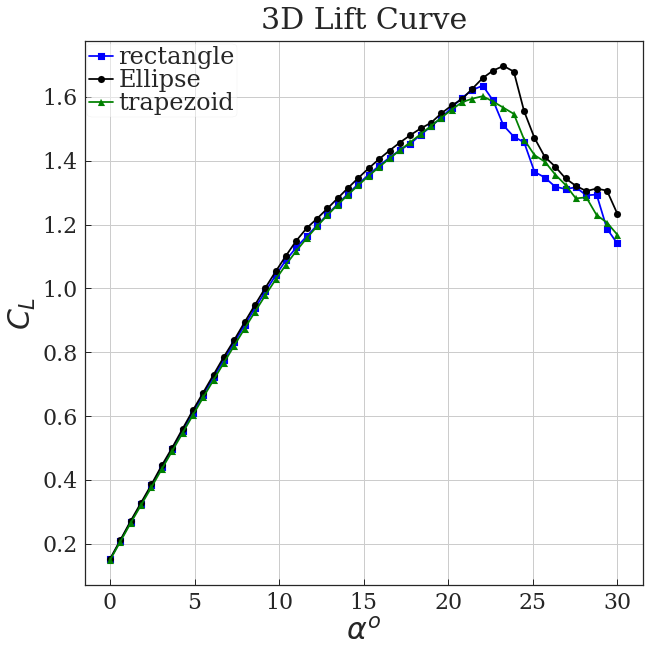

In [33]:
#Plot lift curve
plt.figure(figsize=(10,10))
plt.title('3D Lift Curve')
plt.xlabel(r'$\alpha^o$')
plt.ylabel(r'$C_L$')
plt.plot(polar3Drec['alpha_deg'], polar3Drec['CL'], marker='s',color='blue',label='rectangle')
plt.plot(polar3Delli['alpha_deg'], polar3Delli['CL'], marker='o',color='black',label='Ellipse')
plt.plot(polar3Dtrap['alpha_deg'], polar3Dtrap['CL'], marker='^',color='green',label='trapezoid')
plt.legend()

Above we can see that for $\alpha = 10^o$, all the wings have overlapping curves. Beyond this $\alpha$ the curves start separating. At around $\alpha= 22^o$, the trapezoidal wing reaches its $C_{L,stall}$. The elliptical wing, however, reaches $C_{L,stall}$ around $\alpha= 23.5^o$. The $C_{L,stall}$ for the elliptical wing is also much higher than the trapezoidal wing.

Below the Drag Components of the Elliptic Wing as well as the 3D Drag Polars for all the wings are plotted next to each other.

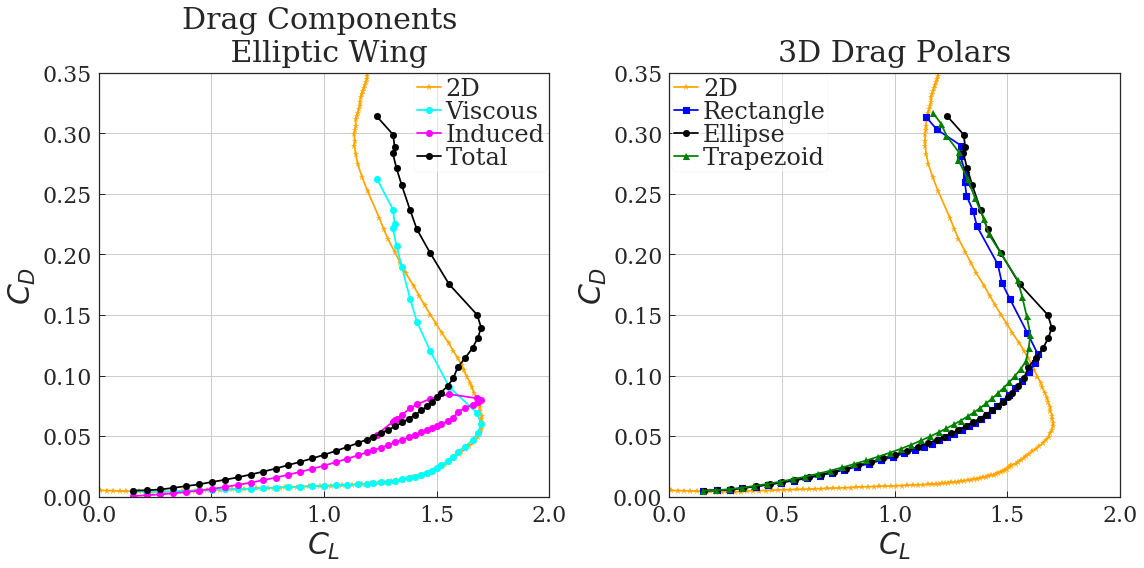

In [34]:
#PLOT LIFT CURVE AND DRAG POLAR IN SAME FIGURE WITH SUBPLOTS
fig, axs = plt.subplots(1, 2, figsize=(16,8))

#Plot lift curve on left subplot
axs[0].set_title('Drag Components \n Elliptic Wing')
axs[0].set_xlabel('$C_L$')
axs[0].set_ylabel('$C_D$')
axs[0].plot(Clxfoilp51d,Cdxfoilp51d, '*-', color='orange', label = '2D')
axs[0].plot(polar3Delli['CL'], polar3Delli['CDv'], marker='o',color='cyan',label='Viscous')
axs[0].plot(polar3Delli['CL'], polar3Delli['CDi'], marker='o',color='magenta',label='Induced')
axs[0].plot(polar3Delli['CL'], polar3Delli['CD'], marker='o',color='black',label='Total')
axs[0].set_xlim([0,2])
axs[0].set_ylim([0,0.35])
axs[0].legend()

#Plot drag polar on right subplot
axs[1].set_title('3D Drag Polars')
axs[1].set_xlabel('$C_L$')
axs[1].set_ylabel('$C_D$')
axs[1].plot(Clxfoilp51d,Cdxfoilp51d, '*-', color='orange', label = '2D')
axs[1].plot(polar3Drec['CL'], polar3Drec['CD'], marker='s',color='blue',label='Rectangle')
axs[1].plot(polar3Delli['CL'], polar3Delli['CD'], marker='o',color='black',label='Ellipse')
axs[1].plot(polar3Dtrap['CL'], polar3Dtrap['CD'], marker='^',color='green',label='Trapezoid')
axs[1].set_xlim([0,2])
axs[1].set_ylim([0,0.35])
axs[1].legend()

plt.tight_layout()

plt.show()

From the graph on the left we can see that the before stall the total drag is dominated by the induced drag. This, however, changes after stall. After stall, the Viscous drag is dominant. The induced drag folds over itself because of numerics errors as well as the fact that the chord is not constant. The chord not being constant makes different parts of the wing stall at different times.

On the left graph It can also be seen that the 2D coefficient of drag resembles the viscous drag polar for the elliptical wing very closely prestall. On the graph to the right, we can see that all thr 3D graphs have a much steeper drag polar than the 2D one. From this we can say that the induced drag coefficient is the reason why the 3D drag polars look much different than the 2D one. XFOIL then does not take into account induced drag very well.

In [35]:
data = [(r'$AR$',AR,AR,AR)]
dfAR = pd.DataFrame(data, columns=['', 'Ellipse', 'Trapezoid','Rectangle'])
dfAR.set_index('')

,Ellipse,Trapezoid,Rectangle
,,,
$AR$,10.638298,10.638298,10.638298


Above we see that the AR for any shape wing is the same. This is because of the way AR is defined, which does not take the chord into account:
$$AR = \frac{b^2}{S}$$

The Elliptical Wing is then the more efficient one since it generates the most lift at any given $\alpha$, has the biggest $C_{L,max}$, and has the least steep Drag Polar. This means that now only does it generate the most lift but it also generates the least drag.

For the level-flight cruise conditions, what will cruise angle of attack acruise be for the P-51D with
the tapered wing in this analysis?
• How does it compare to your 2D analysis results for acruise from Project 6? (Tell me both values
of acruise that you found)

In [36]:
alpha_el = np.interp(Cl_cruise, polar3Delli['CL'], polar3Delli['alpha'])*180/np.pi
alpha_re = np.interp(Cl_cruise, polar3Drec['CL'], polar3Drec['alpha'])*180/np.pi
alpha_tr = np.interp(Cl_cruise, polar3Dtrap['CL'], polar3Dtrap['alpha'])*180/np.pi
data = [(r'$\alpha^o$',alpha_el,alpha_re,alpha_tr,alpha_p51dl)]
df = pd.DataFrame(data, columns=['', 'Ellipse', 'Trapezoid','Rectangle','2D'])
df.set_index('')

,Ellipse,Trapezoid,Rectangle,2D
,,,,
$\alpha^o$,0.764038,0.787809,0.819842,0.430824


The cruise angle of attack, $\alpha_cruise$, for the P-51D is $0.788^o$ for the trapezoidal wing and $0.431^o$ for the 2D analysis. These two are significantly different. The difference mostly comes from the fact that the 3D wing takes more into account, such as induced drag, than the 2D analysis.

## Conclusion
From these calculations we can conclude that the P51D airfoil is better for racing than the NACA 0012 AND NACA 2412 because it outperforms them in both lift generation as well as in reducing drag. We can also observe that the shape of the wing changes everything. The elliptical wing was determined to be the best one since it has the greatest $C_{L,stall}$ as well as that it has lower a $C_{D}$ than the other wing shapes.